In [1]:
import pandas as pd
import webbrowser
import json
from pandas_profiling import ProfileReport
from dataprep.eda import create_report
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import openpyxl

In [96]:
df = pd.read_json("weatherstation.json")

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26175 entries, 0 to 26174
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   timestamp      26175 non-null  datetime64[ns]
 1   precipitation  26162 non-null  float64       
 2   humidity       13085 non-null  float64       
 3   radiation      13085 non-null  float64       
 4   sunshine       13083 non-null  float64       
 5   pressure       13085 non-null  float64       
 6   temperature    13059 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 1.4 MB


In [98]:
df

timestamp  precipitation  humidity  radiation  sunshine  \
0     2018-09-01 00:00:00            0.0      95.6        0.0     599.2   
1     2018-09-01 00:05:00            0.1       NaN        NaN       NaN   
2     2018-09-01 00:10:00            0.0      95.5        0.0     600.0   
3     2018-09-01 00:15:00            0.0       NaN        NaN       NaN   
4     2018-09-01 00:20:00            0.0      95.2        0.0     598.9   
...                   ...            ...       ...        ...       ...   
26170 2018-11-30 22:40:00            0.0      92.8        0.0       0.0   
26171 2018-11-30 22:45:00            0.0       NaN        NaN       NaN   
26172 2018-11-30 22:50:00            0.0      93.0        0.0       0.0   
26173 2018-11-30 22:55:00            0.0       NaN        NaN       NaN   
26174 2018-11-30 23:00:00            0.0      92.4        0.0       0.0   

       pressure  temperature  
0        1016.3         16.1  
1           NaN          NaN  
2        1016.4         16.1  
3           NaN          NaN  
4        1016.5         16.1  
...         ...          ...  
26170    1020.8         -0.7  
26171       NaN          NaN  
26172    1020.9         -0.7  
26173       NaN          NaN  
26174    1021.0         -0.7  

[26175 rows x 7 columns]

In [99]:
df.describe()

precipitation      humidity     radiation      sunshine      pressure  \
count   26162.000000  13085.000000  13085.000000  13083.000000  13085.000000   
mean        0.008142     73.785059    118.825518    187.421539   1019.190394   
std         0.057470     20.232647    201.190397    273.950142      6.711385   
min         0.000000      8.900000      0.000000      0.000000    989.500000   
25%         0.000000     57.500000      0.000000      0.000000   1016.000000   
50%         0.000000     78.900000      0.000000      0.000000   1019.700000   
75%         0.000000     91.300000    161.500000    598.900000   1023.300000   
max         2.700000    100.100000    928.000000    600.000000   1039.800000   

        temperature  
count  13059.000000  
mean      14.067670  
std        6.612924  
min       -1.800000  
25%        9.800000  
50%       13.400000  
75%       18.900000  
max       30.400000

In [100]:
df.nunique()

timestamp        26175
precipitation       15
humidity           834
radiation         3679
sunshine           510
pressure           454
temperature        317
dtype: int64

In [101]:
df.isnull().sum()

timestamp            0
precipitation       13
humidity         13090
radiation        13090
sunshine         13092
pressure         13090
temperature      13116
dtype: int64

In [102]:
df.set_index('timestamp', inplace=True)

In [103]:
df

precipitation  humidity  radiation  sunshine  pressure  \
timestamp                                                                     
2018-09-01 00:00:00            0.0      95.6        0.0     599.2    1016.3   
2018-09-01 00:05:00            0.1       NaN        NaN       NaN       NaN   
2018-09-01 00:10:00            0.0      95.5        0.0     600.0    1016.4   
2018-09-01 00:15:00            0.0       NaN        NaN       NaN       NaN   
2018-09-01 00:20:00            0.0      95.2        0.0     598.9    1016.5   
...                            ...       ...        ...       ...       ...   
2018-11-30 22:40:00            0.0      92.8        0.0       0.0    1020.8   
2018-11-30 22:45:00            0.0       NaN        NaN       NaN       NaN   
2018-11-30 22:50:00            0.0      93.0        0.0       0.0    1020.9   
2018-11-30 22:55:00            0.0       NaN        NaN       NaN       NaN   
2018-11-30 23:00:00            0.0      92.4        0.0       0.0    1021.0   

                     temperature  
timestamp                         
2018-09-01 00:00:00         16.1  
2018-09-01 00:05:00          NaN  
2018-09-01 00:10:00         16.1  
2018-09-01 00:15:00          NaN  
2018-09-01 00:20:00         16.1  
...                          ...  
2018-11-30 22:40:00         -0.7  
2018-11-30 22:45:00          NaN  
2018-11-30 22:50:00         -0.7  
2018-11-30 22:55:00          NaN  
2018-11-30 23:00:00         -0.7  

[26175 rows x 6 columns]

In [104]:
profile = ProfileReport(df, title='weatherstation', explorative=True)
profile.to_file(output_file="weatherstation.html")

In [105]:
webbrowser.open_new_tab('weatherstation.html')

True

In [106]:
df

precipitation  humidity  radiation  sunshine  pressure  \
timestamp                                                                     
2018-09-01 00:00:00            0.0      95.6        0.0     599.2    1016.3   
2018-09-01 00:05:00            0.1       NaN        NaN       NaN       NaN   
2018-09-01 00:10:00            0.0      95.5        0.0     600.0    1016.4   
2018-09-01 00:15:00            0.0       NaN        NaN       NaN       NaN   
2018-09-01 00:20:00            0.0      95.2        0.0     598.9    1016.5   
...                            ...       ...        ...       ...       ...   
2018-11-30 22:40:00            0.0      92.8        0.0       0.0    1020.8   
2018-11-30 22:45:00            0.0       NaN        NaN       NaN       NaN   
2018-11-30 22:50:00            0.0      93.0        0.0       0.0    1020.9   
2018-11-30 22:55:00            0.0       NaN        NaN       NaN       NaN   
2018-11-30 23:00:00            0.0      92.4        0.0       0.0    1021.0   

                     temperature  
timestamp                         
2018-09-01 00:00:00         16.1  
2018-09-01 00:05:00          NaN  
2018-09-01 00:10:00         16.1  
2018-09-01 00:15:00          NaN  
2018-09-01 00:20:00         16.1  
...                          ...  
2018-11-30 22:40:00         -0.7  
2018-11-30 22:45:00          NaN  
2018-11-30 22:50:00         -0.7  
2018-11-30 22:55:00          NaN  
2018-11-30 23:00:00         -0.7  

[26175 rows x 6 columns]

In [107]:
abc=df.dropna()

In [108]:
abc

precipitation  humidity  radiation  sunshine  pressure  \
timestamp                                                                     
2018-09-01 00:00:00            0.0      95.6        0.0     599.2    1016.3   
2018-09-01 00:10:00            0.0      95.5        0.0     600.0    1016.4   
2018-09-01 00:20:00            0.0      95.2        0.0     598.9    1016.5   
2018-09-01 00:30:00            0.0      95.1        0.0     600.0    1016.4   
2018-09-01 00:40:00            0.0      95.3        0.0     600.0    1016.3   
...                            ...       ...        ...       ...       ...   
2018-11-30 22:20:00            0.0      92.2        0.0       0.0    1020.7   
2018-11-30 22:30:00            0.0      92.4        0.0       0.0    1020.7   
2018-11-30 22:40:00            0.0      92.8        0.0       0.0    1020.8   
2018-11-30 22:50:00            0.0      93.0        0.0       0.0    1020.9   
2018-11-30 23:00:00            0.0      92.4        0.0       0.0    1021.0   

                     temperature  
timestamp                         
2018-09-01 00:00:00         16.1  
2018-09-01 00:10:00         16.1  
2018-09-01 00:20:00         16.1  
2018-09-01 00:30:00         16.1  
2018-09-01 00:40:00         16.1  
...                          ...  
2018-11-30 22:20:00         -0.6  
2018-11-30 22:30:00         -0.5  
2018-11-30 22:40:00         -0.7  
2018-11-30 22:50:00         -0.7  
2018-11-30 23:00:00         -0.7  

[13053 rows x 6 columns]

Text(0.5, 0, 'Time')

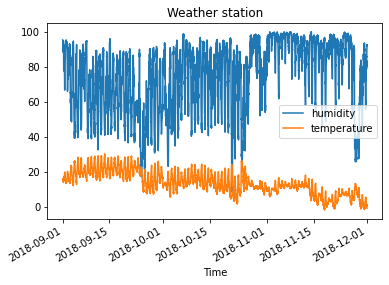

In [109]:
abc[['humidity','temperature']].plot(title='Weather station')
plt.xlabel('Time')

Text(0.5, 0, 'Time')

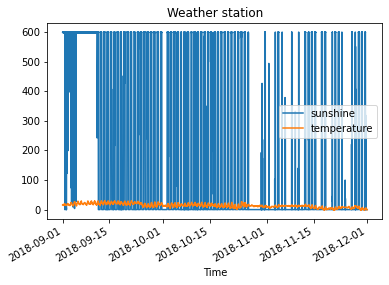

In [110]:
abc[['sunshine','temperature']].plot(title='Weather station')
plt.xlabel('Time')

In [16]:
create_report(df).show_browser()

In [17]:
df.index = pd.to_datetime(df.index)
# df[["value"]].plot(title="Temperature sensor")
# plt.xlabel("Time")
# plt.ylabel('Temperature')
# plt.show()

In [23]:
df.index

DatetimeIndex(['2018-09-01 00:00:00', '2018-09-01 00:05:00',
               '2018-09-01 00:10:00', '2018-09-01 00:15:00',
               '2018-09-01 00:20:00', '2018-09-01 00:25:00',
               '2018-09-01 00:30:00', '2018-09-01 00:35:00',
               '2018-09-01 00:40:00', '2018-09-01 00:45:00',
               ...
               '2018-11-30 22:15:00', '2018-11-30 22:20:00',
               '2018-11-30 22:25:00', '2018-11-30 22:30:00',
               '2018-11-30 22:35:00', '2018-11-30 22:40:00',
               '2018-11-30 22:45:00', '2018-11-30 22:50:00',
               '2018-11-30 22:55:00', '2018-11-30 23:00:00'],
              dtype='datetime64[ns]', name='timestamp', length=26175, freq=None)

In [111]:
df_ws = df.copy()

In [18]:
df_mean = df_ws.copy()

In [11]:
df_ws.dropna(axis=0, how='any', inplace=True)

In [20]:
df_ws.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26175 entries, 0 to 26174
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   timestamp      26175 non-null  datetime64[ns]
 1   precipitation  26162 non-null  float64       
 2   humidity       13085 non-null  float64       
 3   radiation      13085 non-null  float64       
 4   sunshine       13083 non-null  float64       
 5   pressure       13085 non-null  float64       
 6   temperature    13059 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 1.4 MB


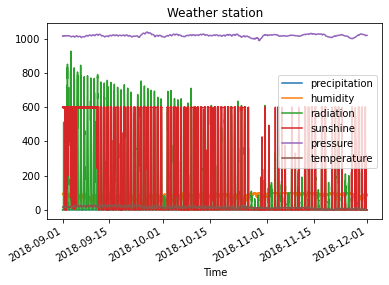

In [13]:
df_ws.plot(title="Weather station")
plt.xlabel("Time")
plt.show()

In [21]:
df_ws.isnull().values.any()

True

In [22]:
df_mean.isnull().sum()

timestamp        0
precipitation    0
humidity         0
radiation        0
sunshine         0
pressure         0
temperature      0
dtype: int64

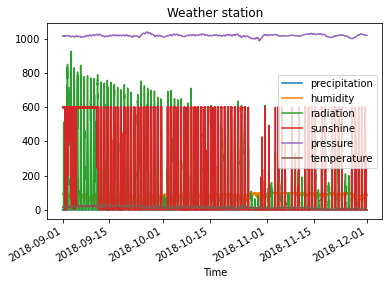

In [39]:
df_ws = df.copy()
df_ws.fillna(method="ffill", inplace=True)
df_ws.plot(title="Weather station")
plt.xlabel("Time")
plt.show()

Text(0.5, 0, 'Temperature')

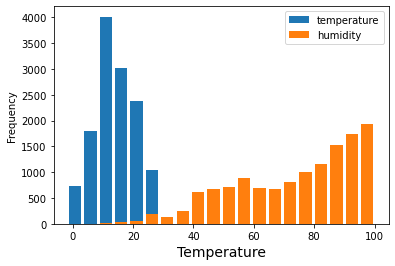

In [15]:
df_ws = pd.read_json('weatherstation.json')
df_ws[['temperature','humidity']].plot(kind='hist', bins=20, rwidth=0.8) # histogram
plt.xlabel('Temperature', fontsize=14)

Text(0.5, 0, 'Pressure')

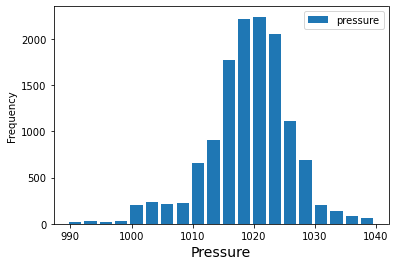

In [52]:
df_ws[['pressure']].plot(kind='hist', bins=20, rwidth=0.8) # histogram
plt.xlabel('Pressure', fontsize=14)

<AxesSubplot:>

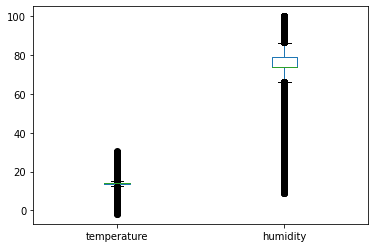

In [23]:
df_mean[['temperature','humidity']].plot(kind='box') # box
# plt.xlabel('Temperature', fontsize=14)

Text(0.5, 0, 'Temperature')

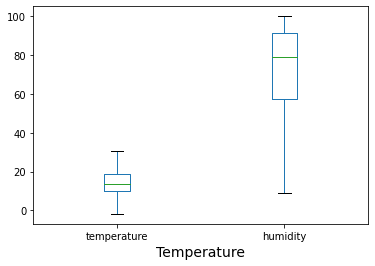

In [16]:
df_ws[['temperature','humidity']].plot(kind='box') # box
plt.xlabel('Temperature', fontsize=14)

Text(0.5, 0, 'Temperature')

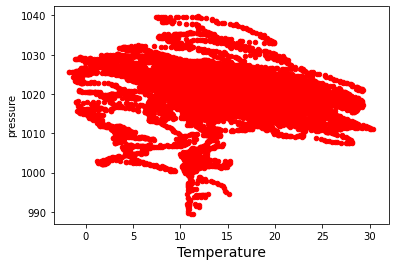

In [24]:
df_mean.plot(kind='scatter', x='temperature', y='pressure', color='red') # scatter
plt.xlabel('Temperature', fontsize=14) # plot kind : str

Text(0.5, 0, 'Temperature')

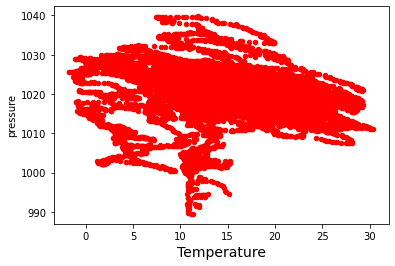

In [57]:
df_ws.plot(kind='scatter', x='temperature', y='pressure', color='red') # scatter
plt.xlabel('Temperature', fontsize=14) # plot kind : str

Text(0.5, 0, 'Temperature')

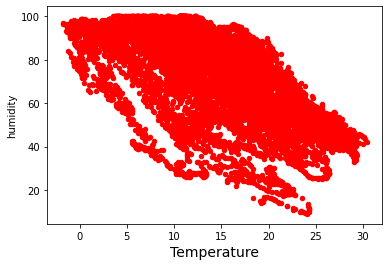

In [58]:
df_ws.plot(kind='scatter', x='temperature', y='humidity', color='red') # scatter
plt.xlabel('Temperature', fontsize=14) # plot kind : str

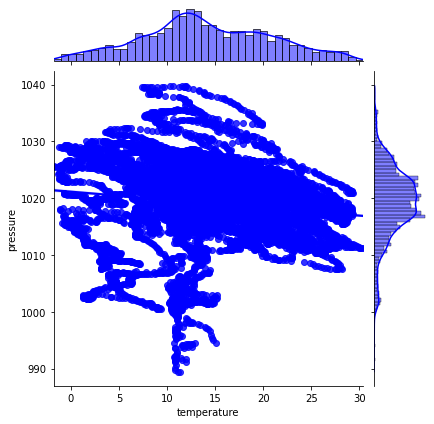

In [59]:
sns.jointplot(data=df_ws, x='temperature', y='pressure', kind='reg', color='blue')
plt.show()

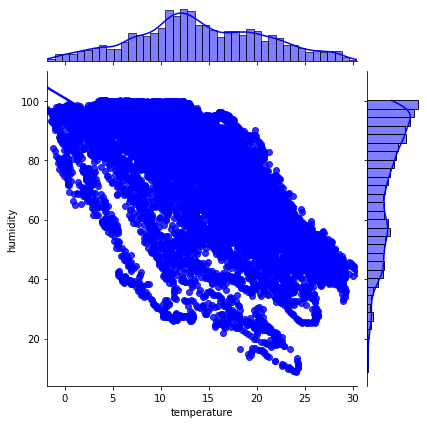

In [60]:
sns.jointplot(data=df_ws, x='temperature', y='humidity', kind='reg', color='blue')
plt.show()

In [120]:
df = pd.read_json("weatherstation.json")

In [113]:
df.set_index('timestamp', inplace=True)

In [114]:
df_ws.isnull().sum()

precipitation       13
humidity         13090
radiation        13090
sunshine         13092
pressure         13090
temperature      13116
dtype: int64

In [122]:
df['precipitation'].fillna(value=df['precipitation'].mean(), inplace=True)
df['humidity'].fillna(value=df['humidity'].mean(), inplace=True)
df['radiation'].fillna(value=df['radiation'].mean(), inplace=True)
df['sunshine'].fillna(value=df['sunshine'].mean(), inplace=True)
df['pressure'].fillna(value=df['pressure'].mean(), inplace=True)
df['temperature'].fillna(value=df['temperature'].mean(), inplace=True)

In [118]:
df['precipitation'].fillna(method="ffill", inplace=True)
df['humidity'].fillna(method="ffill", inplace=True)
df['radiation'].fillna(method="ffill", inplace=True)
df['sunshine'].fillna(method="ffill", inplace=True)
df['pressure'].fillna(method="ffill", inplace=True)
df['temperature'].fillna(method="ffill", inplace=True)

Text(0.5, 0, 'Time')

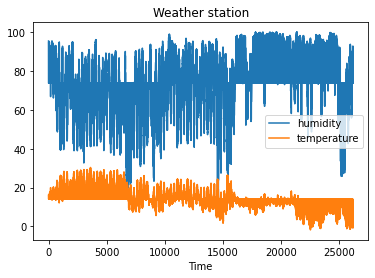

In [123]:
df[['humidity','temperature']].plot(title='Weather station')
plt.xlabel('Time')

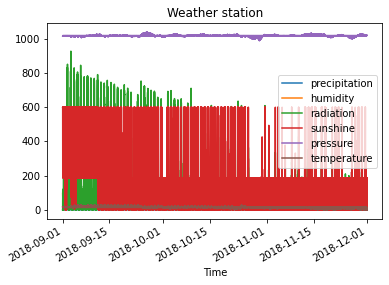

In [66]:
df.plot(title="Weather station")
plt.xlabel("Time")
plt.show()

Text(0.5, 0, 'Temperature')

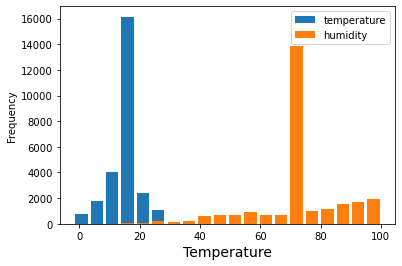

In [67]:
df[['temperature','humidity']].plot(kind='hist', bins=20, rwidth=0.8) # histogram
plt.xlabel('Temperature', fontsize=14)

Text(0.5, 0, 'Temperature')

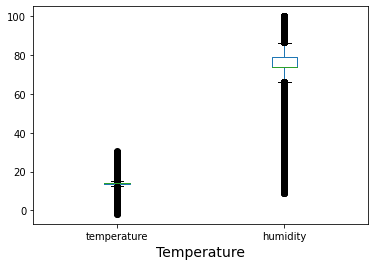

In [68]:
df[['temperature','humidity']].plot(kind='box') # box
plt.xlabel('Temperature', fontsize=14)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26175 entries, 0 to 26174
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   timestamp      26175 non-null  datetime64[ns]
 1   precipitation  26175 non-null  float64       
 2   humidity       26175 non-null  float64       
 3   radiation      26175 non-null  float64       
 4   sunshine       26175 non-null  float64       
 5   pressure       26175 non-null  float64       
 6   temperature    26175 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 1.6 MB
df_filtered.info():
None


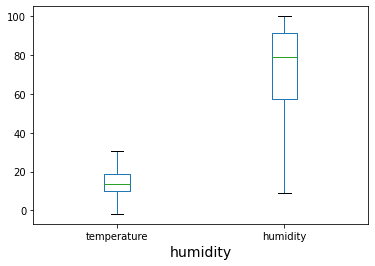

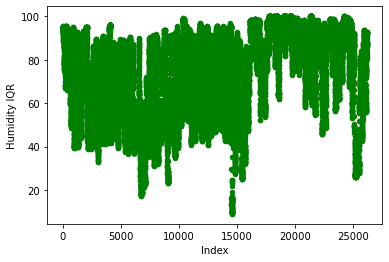


df_notime.shape:
 (26175, 6)

df_no_outliers.shape
(25194, 6)


In [73]:
# file: iqr_zscore.py
df = pd.read_json('weatherstation.json')
df.interpolate(method='polynomial', order=2, limit_direction='forward', inplace=True) # Fix NaN
df[['temperature','humidity']].plot(kind='box') # box plot
plt.xlabel('humidity', fontsize=14)
# The interquartile range (IQR) is the difference between the 75th and 25th percentile of the data.
# It is similar to standard deviation or variance, but more robust against outliers.
Q1 = df['humidity'].quantile(0.25) # Computing the IQR
Q3 = df['humidity'].quantile(0.75)
IQR = Q3 - Q1
# Filtering out outlier values between Q1 - 1.5 IQR and Q3 + 1.5 IQR
df_filtered = df.query('(@Q1 - 1.5 * @IQR) <= humidity <= (@Q3 + 1.5 * @IQR)')
print(f'df_filtered.info():\n{df_filtered.info()}')
# reset index after filter and scatter plot panda way
df_filtered.reset_index().plot.scatter(x='index', y='humidity', color='green')
plt.xlabel('Index')
plt.ylabel('Humidity IQR')
plt.show() # show box and scatter IQR for humidity
# An alternative approach, drop specified labels from rows or columns
df_notime = df.drop(['timestamp'], axis=1)
print(f'\ndf_notime.shape:\n {df_notime.shape}')
# for all columns in dataframe remove 3 * std with numpy
df_no_outliers = df_notime[np.abs(df_notime - df_notime.mean()) <= (3 * df_notime.std())]
# clean up and remove rows with empty data
df_no_outliers.dropna(inplace=True)
df_no_outliers.reset_index(drop=True, inplace=True)
print(f'\ndf_no_outliers.shape\n{df_no_outliers.shape}') # –> plot blue scatter IQR for humidity

head():
                                         0                    1  \
timestamp             2018-09-01 00:00:00  2018-09-01 00:05:00   
precipitation                           0                  0.1   
humidity                             95.6              95.5826   
radiation                               0          1.43915e-23   
sunshine                            599.2              599.937   
pressure                           1016.3              1016.34   
temperature                          16.1              16.0999   
precipitation_zscore            -0.142186              1.58824   
humidity_zscore                    1.0785              1.07764   
radiation_zscore                -0.590963            -0.590963   
sunshine_zscore                    1.5056              1.50829   
pressure_zscore                  -0.43015            -0.423464   
temperature_zscore               0.308302             0.308289   

                                        2                    3  \


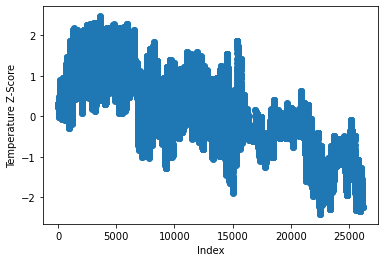

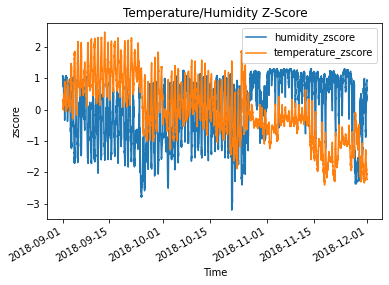

In [77]:
df = pd.read_json('weatherstation.json')
df.interpolate(method='polynomial', order=2, limit_direction='forward', inplace=True) # Fix NaN
cols = list(df.columns) # Build a list from the columns
cols.remove('timestamp') # remove cols for which you do not want to calculate Z-scores
# now iterate over the remaining columns and create new z-score columns and row values
for col in cols:
 col_zscore = col + '_zscore'
 df[col_zscore] = (df[col] - df[col].mean())/df[col].std(ddof=0) # ddof default 1
print(f'head():\n {df.head().transpose()}\n')
df.to_excel('z-scores.xlsx') # store Z-Scores for every col/row sample value in excel
plt.scatter(df.index, df.temperature_zscore) # scatter plot matplotlib way
plt.xlabel('Index')
plt.ylabel('Temperature Z-Score')
plt.show()
# line plot precipitation,humidity,radiation,sunshine,pressure,temperature
df.set_index('timestamp', inplace=True)
df.index = pd.to_datetime(df.index)
df[['humidity_zscore','temperature_zscore']].plot(title="Temperature/Humidity Z-Score")
plt.xlabel("Time")
plt.ylabel('zscore')
plt.show()

Correleation:
             humidity  radiation  sunshine  pressure  temperature
humidity     1.000000  -0.584072 -0.512317 -0.013164    -0.631521
radiation   -0.584072   1.000000  0.743783  0.026103     0.515504
sunshine    -0.512317   0.743783  1.000000  0.012267     0.535265
pressure    -0.013164   0.026103  0.012267  1.000000    -0.138407
temperature -0.631521   0.515504  0.535265 -0.138407     1.000000


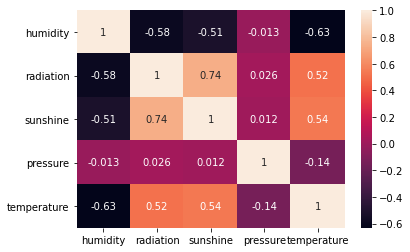

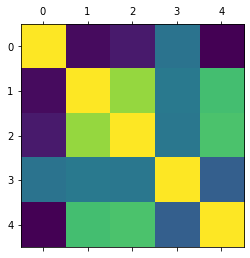

In [80]:
df = pd.read_json('weatherstation.json')
# Fix NaN
df.interpolate(method='polynomial', order=2, limit_direction='forward', inplace=True)
# Selecting Subsets of Data in Pandas: Part 1
# https://medium.com/dunder-data/selecting-subsets-of-data-in-pandas-6fcd0170be9c
# precipitation,humidity,radiation,sunshine,pressure,temperature
df_subset = df[['humidity', 'radiation' , 'sunshine', 'pressure', 'temperature']]
print(f'Correleation:\n{df_subset.corr()}')
sns.heatmap(df_subset.corr(), annot=True)
plt.show()
# matplotlib
plt.matshow(df_subset.corr())
plt.show()

In [ ]:
# seaborn
sns.heatmap(df_subset, annot=True)
plt.show()

In [79]:
dfsep = pd.read_csv('wind_data_sep.csv')
dfoct = pd.read_csv('wind_data_oct.csv')
dfoctd = pd.read_csv('wind_data_oct.csv')
dfnov = pd.read_csv('wind_data_nov.csv')

In [130]:
df

timestamp  wind_speed  wind_direction
0     2018-09-01 00:00:00    4.443333       68.685333
1     2018-09-01 00:15:00    4.122467       71.740667
2     2018-09-01 00:30:00    3.427533       67.434667
3     2018-09-01 00:45:00    3.437867       68.142667
4     2018-09-01 01:00:00    3.688533       69.695333
...                   ...         ...             ...
2875  2018-11-30 22:45:00    1.710600      274.213333
2876  2018-11-30 23:00:00    1.687400      272.740000
2877  2018-11-30 23:15:00    1.629200      263.320000
2878  2018-11-30 23:30:00    1.529267      267.520000
2879  2018-11-30 23:45:00    1.643333      246.640000

[8736 rows x 3 columns]

Correleation:
                wind_speed  wind_direction
wind_speed        1.000000        0.364063
wind_direction    0.364063        1.000000


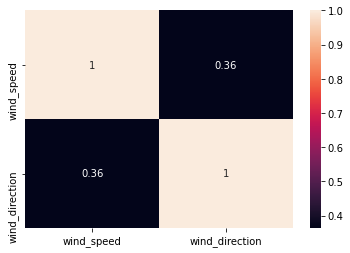

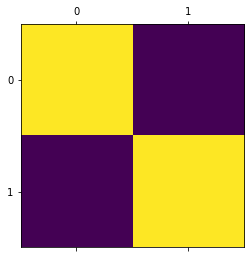

In [131]:
df.interpolate(method='polynomial', order=2, limit_direction='forward', inplace=True)
# Selecting Subsets of Data in Pandas: Part 1
# https://medium.com/dunder-data/selecting-subsets-of-data-in-pandas-6fcd0170be9c
# precipitation,humidity,radiation,sunshine,pressure,temperature
df_subset = df[['wind_speed', 'wind_direction']]
print(f'Correleation:\n{df_subset.corr()}')
sns.heatmap(df_subset.corr(), annot=True)
plt.show()
# matplotlib
plt.matshow(df_subset.corr())
plt.show()

In [84]:
print(dfsep.isnull().sum())
print(dfoct.isnull().sum())
print(dfnov.isnull().sum())
print(dfoctd.isnull().sum())

timestamp         0
wind_speed        0
wind_direction    0
dtype: int64
timestamp         0
wind_speed        0
wind_direction    0
dtype: int64
timestamp         0
wind_speed        0
wind_direction    0
dtype: int64
timestamp         0
wind_speed        0
wind_direction    0
dtype: int64


In [74]:
doctd

In [81]:
dfoctd.dropna(axis=0, how='any', inplace=True)

In [83]:
dfoct.fillna(method="ffill", inplace=True)

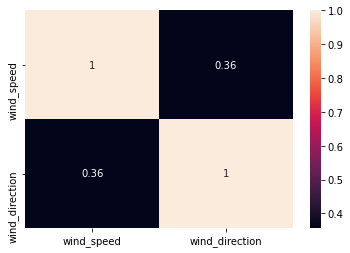

In [12]:
sns.heatmap(dfsep.corr(), annot=True)
plt.show()

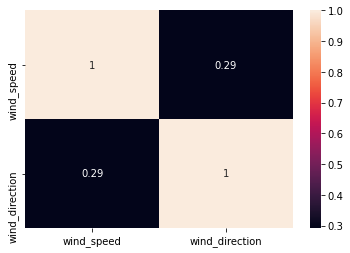

In [14]:
sns.heatmap(dfnov.corr(), annot=True)
plt.show()

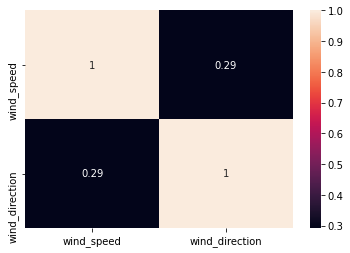

In [15]:
sns.heatmap(dfnov.corr(), annot=True)
plt.show()

In [18]:
dfnov

timestamp  wind_speed  wind_direction
0     2018-11-01 00:00:00    3.058733      300.820000
1     2018-11-01 00:15:00    4.493533      308.893333
2     2018-11-01 00:30:00    4.796067      322.640000
3     2018-11-01 00:45:00    3.894267      306.646667
4     2018-11-01 01:00:00    4.916467      315.213333
...                   ...         ...             ...
2875  2018-11-30 22:45:00    1.710600      274.213333
2876  2018-11-30 23:00:00    1.687400      272.740000
2877  2018-11-30 23:15:00    1.629200      263.320000
2878  2018-11-30 23:30:00    1.529267      267.520000
2879  2018-11-30 23:45:00    1.643333      246.640000

[2880 rows x 3 columns]

In [124]:
df = pd.concat([dfsep,dfoct, dfnov])

In [62]:
df.to_csv("Combined.csv")

In [88]:
print("sept\n",dfsep.mean())
print("oct fill na\n",dfoct.mean())
print("oct drop na\n",dfoctd.mean())
print("nov\n",dfnov.mean())
print(df.mean())

sept
 wind_speed          3.815301
wind_direction    132.810118
dtype: float64
oct fill na
 wind_speed          5.205481
wind_direction    235.194922
dtype: float64
oct drop na
 wind_speed          5.446737
wind_direction    241.164227
dtype: float64
nov
 wind_speed          3.757534
wind_direction    227.598412
dtype: float64
wind_speed          4.269835
wind_direction    198.937346
dtype: float64


In [58]:
df.set_index('timestamp', inplace=True)

In [30]:
df.describe()

wind_speed  wind_direction
count  8736.000000     8736.000000
mean      4.269835      198.937346
std       2.450847       88.811740
min       0.081000       20.225667
25%       2.433233      112.515000
50%       3.815633      225.215033
75%       5.617450      278.615000
max      15.777333      343.893333

Text(0.5, 0, 'Time')

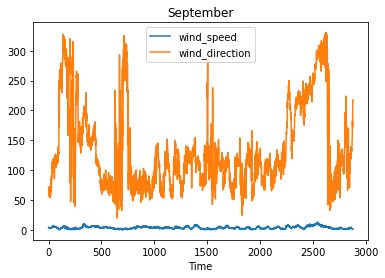

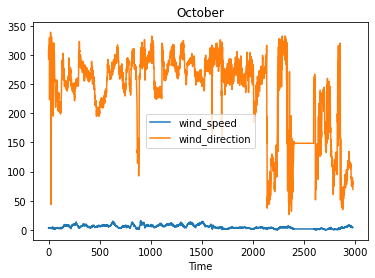

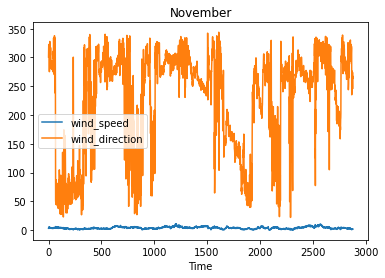

In [129]:
dfsep[['wind_speed','wind_direction']].plot(title='September')
plt.xlabel('Time')
dfoct[['wind_speed','wind_direction']].plot(title='October')
plt.xlabel('Time')
dfnov[['wind_speed','wind_direction']].plot(title='November')
plt.xlabel('Time')

Text(0.5, 0, 'Time')

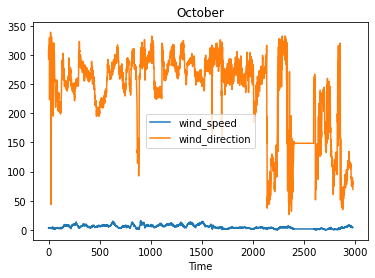

In [126]:
dfoct[['wind_speed','wind_direction']].plot(title='October')
plt.xlabel('Time')

Text(0.5, 0, 'Time')

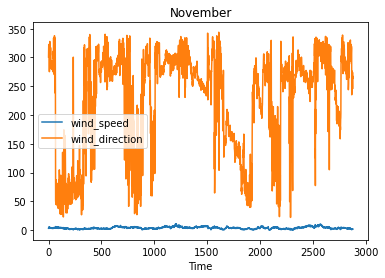

In [127]:
dfnov[['wind_speed','wind_direction']].plot(title='November')
plt.xlabel('Time')

C:\Users\makn0023\Anaconda3\envs\mlc\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Text(0.5, 0, 'Time')

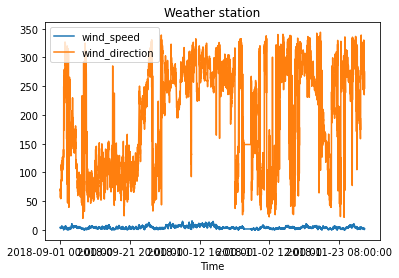

In [24]:
df[['wind_speed','wind_direction']].plot(title='Weather station')
plt.xlabel('Time')

In [26]:
df

wind_speed  wind_direction
timestamp                                      
2018-09-01 00:00:00    4.443333       68.685333
2018-09-01 00:15:00    4.122467       71.740667
2018-09-01 00:30:00    3.427533       67.434667
2018-09-01 00:45:00    3.437867       68.142667
2018-09-01 01:00:00    3.688533       69.695333
...                         ...             ...
2018-11-30 22:45:00    1.710600      274.213333
2018-11-30 23:00:00    1.687400      272.740000
2018-11-30 23:15:00    1.629200      263.320000
2018-11-30 23:30:00    1.529267      267.520000
2018-11-30 23:45:00    1.643333      246.640000

[8736 rows x 2 columns]

<AxesSubplot:>

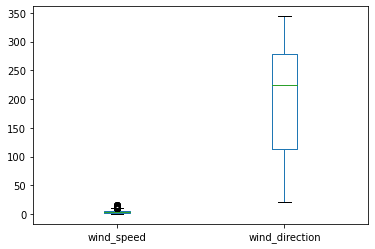

In [59]:
df[['wind_speed','wind_direction']].plot(kind='box') # box plot
# plt.xlabel('humidity', fontsize=14)

In [60]:
profile = ProfileReport(df, title='Wind Data', explorative=True)
profile.to_file(output_file="winddata.html")
webbrowser.open_new_tab('winddata.html')

True

In [33]:
df.size

17472

In [40]:
df

timestamp  wind_speed  wind_direction
0     2018-09-01 00:00:00    4.443333       68.685333
1     2018-09-01 00:15:00    4.122467       71.740667
2     2018-09-01 00:30:00    3.427533       67.434667
3     2018-09-01 00:45:00    3.437867       68.142667
4     2018-09-01 01:00:00    3.688533       69.695333
...                   ...         ...             ...
2875  2018-11-30 22:45:00    1.710600      274.213333
2876  2018-11-30 23:00:00    1.687400      272.740000
2877  2018-11-30 23:15:00    1.629200      263.320000
2878  2018-11-30 23:30:00    1.529267      267.520000
2879  2018-11-30 23:45:00    1.643333      246.640000

[8736 rows x 3 columns]

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8736 entries, 0 to 2879
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   timestamp       8736 non-null   object 
 1   wind_speed      8736 non-null   float64
 2   wind_direction  8736 non-null   float64
dtypes: float64(2), object(1)
memory usage: 273.0+ KB


In [42]:
df["timestamp"].dtype

dtype('O')

In [44]:
df.timestamp

0       2018-09-01 00:00:00
1       2018-09-01 00:15:00
2       2018-09-01 00:30:00
3       2018-09-01 00:45:00
4       2018-09-01 01:00:00
               ...         
2875    2018-11-30 22:45:00
2876    2018-11-30 23:00:00
2877    2018-11-30 23:15:00
2878    2018-11-30 23:30:00
2879    2018-11-30 23:45:00
Name: timestamp, Length: 8736, dtype: object

In [50]:
df=df.reset_index()

In [56]:
pd.to_datetime(df["timestamp"][1], unit='h')

ValueError: non convertible value 2018-09-01 00:15:00 with the unit 'h'

In [45]:
df_tmp.index = pd.to_datetime(df.timestamp, unit='s')
# df_tmp = df.resample('300S').pad()

ValueError: non convertible value 2018-09-01 00:00:00 with the unit 's'

In [ ]:
df_tmp = df_tmp.resample('300S').pad()
df_temp.drop(['timestamp'], axis=1, inplace=True) # drop old timestamp column
df_tmp = df_tmp.resample('1200S').mean() # downsample to 20 minute bins and fill with mean
print(f'\ndf_temp.head() 1200S:\n{df_temp.head()}')
df_sun.index = pd.to_datetime(df_sun.timestamp, unit='s')
df_sun = df_sun.resample('1200S').mean()
print(f'df_sun.head() 1200S:\n{df_sun.head()}')
df_merged = pd.merge_asof(df_tmp, df_sun, on='timestamp', by='timestamp')
df_merged.rename(columns={'value_x': 'temperature', 'value_y': 'sunshine'}, inplace=True)
sns.pairplot(df_merged)
plt.show()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8521 entries, 0 to 2879
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   timestamp       8521 non-null   object 
 1   wind_speed      8521 non-null   float64
 2   wind_direction  8521 non-null   float64
dtypes: float64(2), object(1)
memory usage: 266.3+ KB
df_filtered.info():
None


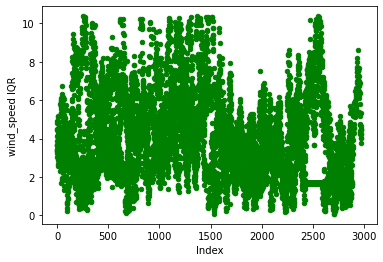


df_notime.shape:
 (8736, 2)

df_no_outliers.shape
(8634, 2)


In [39]:
Q1 = df['wind_speed'].quantile(0.25) # Computing the IQR
Q3 = df['wind_speed'].quantile(0.75)
IQR = Q3 - Q1
df_filtered = df.query('(@Q1 - 1.5 * @IQR) <= wind_speed <= (@Q3 + 1.5 * @IQR)')
print(f'df_filtered.info():\n{df_filtered.info()}')
# reset index after filter and scatter plot panda way
df_filtered.reset_index().plot.scatter(x='index', y='wind_speed', color='green')
plt.xlabel('Index')
plt.ylabel('wind_speed IQR')
plt.show() # show box and scatter IQR for humidity
# An alternative approach, drop specified labels from rows or columns
df_notime = df.drop(['timestamp'], axis=1)
print(f'\ndf_notime.shape:\n {df_notime.shape}')
# for all columns in dataframe remove 3 * std with numpy
df_no_outliers = df_notime[np.abs(df_notime - df_notime.mean()) <= (3 * df_notime.std())]
# clean up and remove rows with empty data
df_no_outliers.dropna(inplace=True)
df_no_outliers.reset_index(drop=True, inplace=True)
print(f'\ndf_no_outliers.shape\n{df_no_outliers.shape}') # –> plot blue scatter IQR for humidity

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8736 entries, 0 to 2879
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   timestamp       8736 non-null   object 
 1   wind_speed      8736 non-null   float64
 2   wind_direction  8736 non-null   float64
dtypes: float64(2), object(1)
memory usage: 273.0+ KB
df_filtered.info():
None


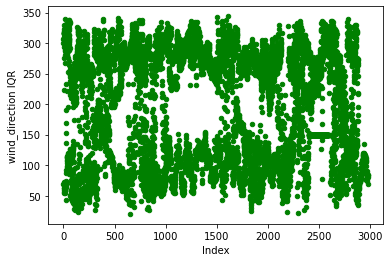


df_notime.shape:
 (8736, 2)

df_no_outliers.shape
(8634, 2)


In [41]:
Q1 = df['wind_direction'].quantile(0.25) # Computing the IQR
Q3 = df['wind_direction'].quantile(0.75)
IQR = Q3 - Q1
df_filtered = df.query('(@Q1 - 1.5 * @IQR) <= wind_direction <= (@Q3 + 1.5 * @IQR)')
print(f'df_filtered.info():\n{df_filtered.info()}')
# reset index after filter and scatter plot panda way
df_filtered.reset_index().plot.scatter(x='index', y='wind_direction', color='green')
plt.xlabel('Index')
plt.ylabel('wind_direction IQR')
plt.show() # show box and scatter IQR for humidity
# An alternative approach, drop specified labels from rows or columns
df_notime = df.drop(['timestamp'], axis=1)
print(f'\ndf_notime.shape:\n {df_notime.shape}')
# for all columns in dataframe remove 3 * std with numpy
df_no_outliers = df_notime[np.abs(df_notime - df_notime.mean()) <= (3 * df_notime.std())]
# clean up and remove rows with empty data
df_no_outliers.dropna(inplace=True)
df_no_outliers.reset_index(drop=True, inplace=True)
print(f'\ndf_no_outliers.shape\n{df_no_outliers.shape}') # –> plot blue scatter IQR for humidity

In [49]:
df.to_csv("Wind Data.csv")